In [ ]:
!pip install -Uqq duckduckgo_search

In [ ]:
from fastcore.all import *
from duckduckgo_search  import  DDGS

In [ ]:
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [ ]:
urls=search_images('baby photos',max_images=1)
urls[0]

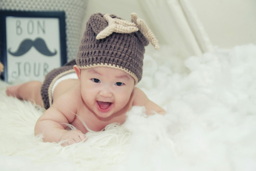

In [ ]:
from fastdownload import download_url
dest='baby.jpeg'
download_url(urls[0],dest,show_progress=False)
from fastai.vision.all import *
im=Image.open(dest)
im.to_thumb(256,256)

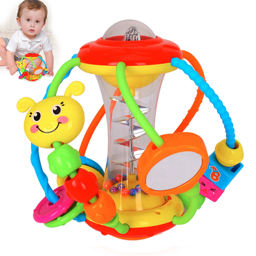

In [ ]:
url=search_images('toy photos',max_images=1)
url[0]

dest='toy.jpeg'
download_url(url[0],dest,show_progress=False)

im=Image.open(dest)
im.to_thumb(256,256)

In [ ]:
searches = 'baby','toy'
path = Path('baby_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA imag

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


13

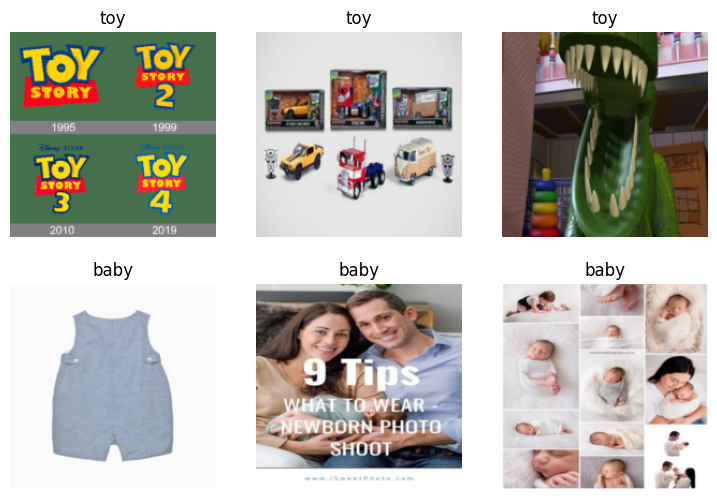

In [ ]:
dls=DataBlock(blocks=(ImageBlock,CategoryBlock),
                splitter=RandomSplitter(valid_pct=0.2,seed=42),
                get_items=get_image_files,
                item_tfms=[Resize(192,method="squish")],
                get_y=parent_label).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 92.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.742996,0.390009,0.136986,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.279880,0.283986,0.095890,00:01
1,0.162800,0.245075,0.095890,00:01
2,0.110363,0.246920,0.082192,00:01


In [ ]:
is_baby,_,probs = learn.predict(PILImage.create('baby.jpeg'))
print(f"This is a: {is_baby}.")
print(f"Probability it's a baby: {probs[0]:.4f}")

This is a: baby.
Probability it's a baby: 0.9997
